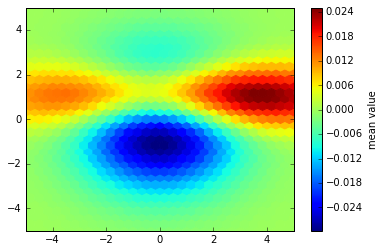

In [2]:
from matplotlib import pyplot as PLT
from matplotlib import cm as CM
from matplotlib import mlab as ML
import numpy as NP
%matplotlib inline

n = 1e5
x = y = NP.linspace(-5, 5, 100)
X, Y = NP.meshgrid(x, y)
Z1 = ML.bivariate_normal(X, Y, 2, 2, 0, 0)
Z2 = ML.bivariate_normal(X, Y, 4, 1, 1, 1)
ZD = Z2 - Z1
x = X.ravel()
y = Y.ravel()
z = ZD.ravel()
gridsize=30
PLT.subplot(111)

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 

PLT.hexbin(x, y, C=z, gridsize=gridsize, cmap=CM.jet, bins=None)
PLT.axis([x.min(), x.max(), y.min(), y.max()])

cb = PLT.colorbar()
cb.set_label('mean value')
PLT.show() 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
H = np.ones((4, 4)).cumsum().reshape(4, 4)
print H[::-1]  # This shows the bin content in the order as plotted

[[ 13.  14.  15.  16.]
 [  9.  10.  11.  12.]
 [  5.   6.   7.   8.]
 [  1.   2.   3.   4.]]


In [29]:
>>> xedges = [0, 1, 1.5, 3, 5]
>>> yedges = [0, 2, 3, 4, 6]

In [30]:
>>> x = np.random.normal(3, 1, 100)
>>> y = np.random.normal(1, 1, 100)
>>> H, xedges, yedges = np.histogram2d(y, x, bins=(xedges, yedges))

In [31]:
>>> H = np.ones((4, 4)).cumsum().reshape(4, 4)
>>> print H[::-1]  # This shows the bin content in the order as plotted

[[ 13.  14.  15.  16.]
 [  9.  10.  11.  12.]
 [  5.   6.   7.   8.]
 [  1.   2.   3.   4.]]


In [32]:
np.histogram2d()


TypeError: 'NoneType' object is not iterable

In [52]:
import matplotlib.pyplot as plt
from matplotlib import colors, cm
from matplotlib.collections import RegularPolyCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import numpy as np

def plot_map(grid,
             d_matrix,
             w=1080,
            dpi=72.,
            title='SOM Hit map'):
    """
    Plot hexagon map where each neuron is represented by a hexagon. The hexagon
    color is given by the distance between the neurons (D-Matrix)

    Args:
    - grid: Grid dictionary (keys: centers, x, y ),
    - d_matrix: array contaning the distances between each neuron
    - w: width of the map in inches
    - title: map title

    Returns the Matplotlib SubAxis instance
    """
    n_centers = grid['centers']
    x, y = grid['x'], grid['y']
    # Size of figure in inches
    xinch = (x * w / y) / dpi
    yinch = (y * w / x) / dpi
    fig = plt.figure(figsize=(xinch, yinch), dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    # Get pixel size between to data points
    xpoints = n_centers[:, 0]
    ypoints = n_centers[:, 1]
    ax.scatter(xpoints, ypoints, s=0.0, marker='s')
    ax.axis([min(xpoints)-1., max(xpoints)+1.,
             min(ypoints)-1., max(ypoints)+1.])
    xy_pixels = ax.transData.transform(np.vstack([xpoints, ypoints]).T)
    xpix, ypix = xy_pixels.T

    # In matplotlib, 0,0 is the lower left corner, whereas it's usually the
    # upper right for most image software, so we'll flip the y-coords
    width, height = fig.canvas.get_width_height()
    ypix = height - ypix

    # discover radius and hexagon
    apothem = .9 * (xpix[1] - xpix[0]) / math.sqrt(3)
    area_inner_circle = math.pi * (apothem ** 2)
    collection_bg = RegularPolyCollection(
        numsides=6,  # a hexagon
        rotation=0,
        sizes=(area_inner_circle,),
        edgecolors = (0, 0, 0, 1),
        array= d_matrix,
        cmap = cm.viridis,
        offsets = n_centers,
        transOffset = ax.transData,
    )
    ax.add_collection(collection_bg, autolim=True)

    ax.axis('off')
    ax.autoscale_view()
    ax.set_title(title)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="10%", pad=0.05)
    plt.colorbar(collection_bg, cax=cax)

    return ax

In [53]:
grid = {'centers': np.array([[ 1.5       ,  0.8660254 ],
   [ 2.5       ,  0.8660254 ],
   [ 3.5       ,  0.8660254 ],
   [ 4.5       ,  0.8660254 ],
   [ 5.5       ,  0.8660254 ],
   [ 6.5       ,  0.8660254 ],
   [ 1.        ,  1.73205081],
   [ 2.        ,  1.73205081],
   [ 3.        ,  1.73205081],
   [ 4.        ,  1.73205081],
   [ 5.        ,  1.73205081],
   [ 6.        ,  1.73205081],
   [ 1.5       ,  2.59807621],
   [ 2.5       ,  2.59807621],
   [ 3.5       ,  2.59807621],
   [ 4.5       ,  2.59807621],
   [ 5.5       ,  2.59807621],
   [ 6.5       ,  2.59807621],
   [ 1.        ,  3.46410162],
   [ 2.        ,  3.46410162],
   [ 3.        ,  3.46410162],
   [ 4.        ,  3.46410162],
   [ 5.        ,  3.46410162],
   [ 6.        ,  3.46410162],
   [ 1.5       ,  4.33012702],
   [ 2.5       ,  4.33012702],
   [ 3.5       ,  4.33012702],
   [ 4.5       ,  4.33012702],
   [ 5.5       ,  4.33012702],
   [ 6.5       ,  4.33012702],
   [ 1.        ,  5.19615242],
   [ 2.        ,  5.19615242],
   [ 3.        ,  5.19615242],
   [ 4.        ,  5.19615242],
   [ 5.        ,  5.19615242],
   [ 6.        ,  5.19615242]]),
'x': np.array([ 6.]),
'y': np.array([ 6.])}

In [54]:
grid['centers'].shape[0]

36L

In [55]:
d_matrix = np.array(np.random.randint(100,size=grid['centers'].shape[0]))

In [56]:
d_matrix

array([ 4, 10, 80,  4, 36, 38, 36, 38, 39, 90, 43, 56, 42, 21, 66, 47, 19,
        5, 48,  1, 14, 39, 98, 10, 86, 88, 53, 27, 55, 40,  0, 14, 73,  5,
       52, 11])

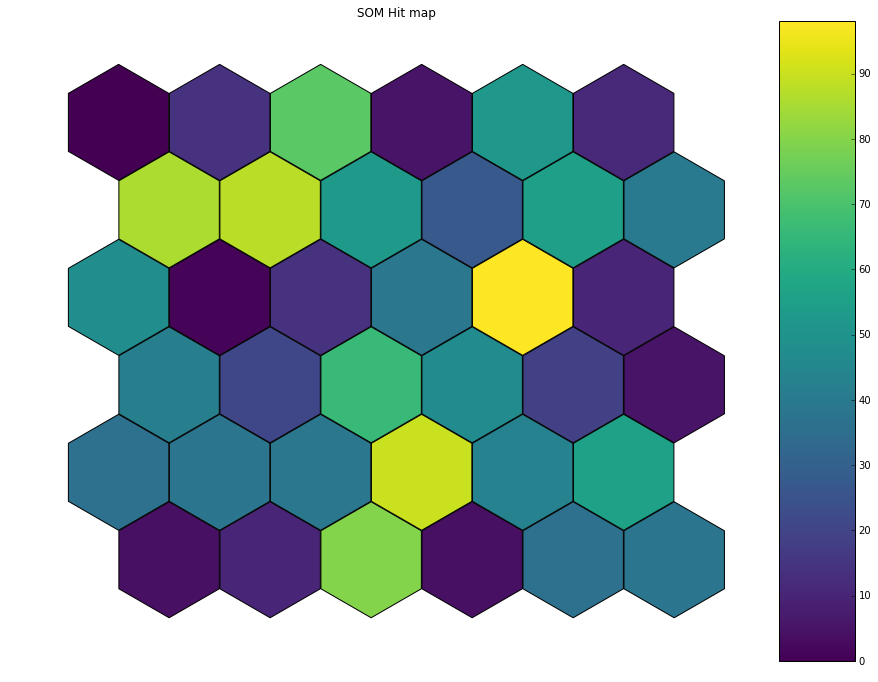

In [57]:
plot_map(grid, d_matrix)